In [99]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [101]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [103]:
train_data=r"C:\Users\dhanu\Downloads\archive (3)\train\train"
test_data=r"C:\Users\dhanu\Downloads\archive (3)\test\test"

In [105]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        folder_path = os.path.join(directory, label)
        
        if not os.path.exists(folder_path):  # Skip if folder is missing
            print(f"Warning: Folder {folder_path} not found. Skipping...")
            continue

        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image_paths.append(image_path)
            labels.append(label)
    
    return image_paths, labels


In [107]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_data)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,image,label
0,C:\Users\dhanu\Downloads\archive (3)\train\tra...,angry
1,C:\Users\dhanu\Downloads\archive (3)\train\tra...,fear
2,C:\Users\dhanu\Downloads\archive (3)\train\tra...,sad
3,C:\Users\dhanu\Downloads\archive (3)\train\tra...,surprise
4,C:\Users\dhanu\Downloads\archive (3)\train\tra...,fear


In [109]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_data)
test.head()

,image,label
0,C:\Users\dhanu\Downloads\archive (3)\test\test...,angry
1,C:\Users\dhanu\Downloads\archive (3)\test\test...,angry
2,C:\Users\dhanu\Downloads\archive (3)\test\test...,angry
3,C:\Users\dhanu\Downloads\archive (3)\test\test...,angry
4,C:\Users\dhanu\Downloads\archive (3)\test\test...,angry


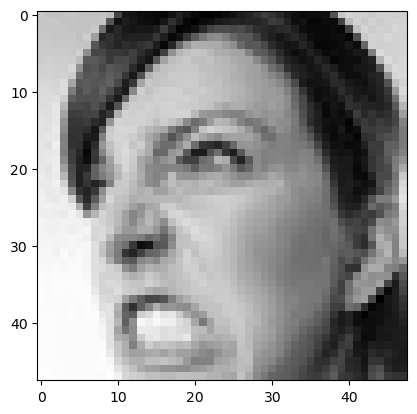

In [111]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

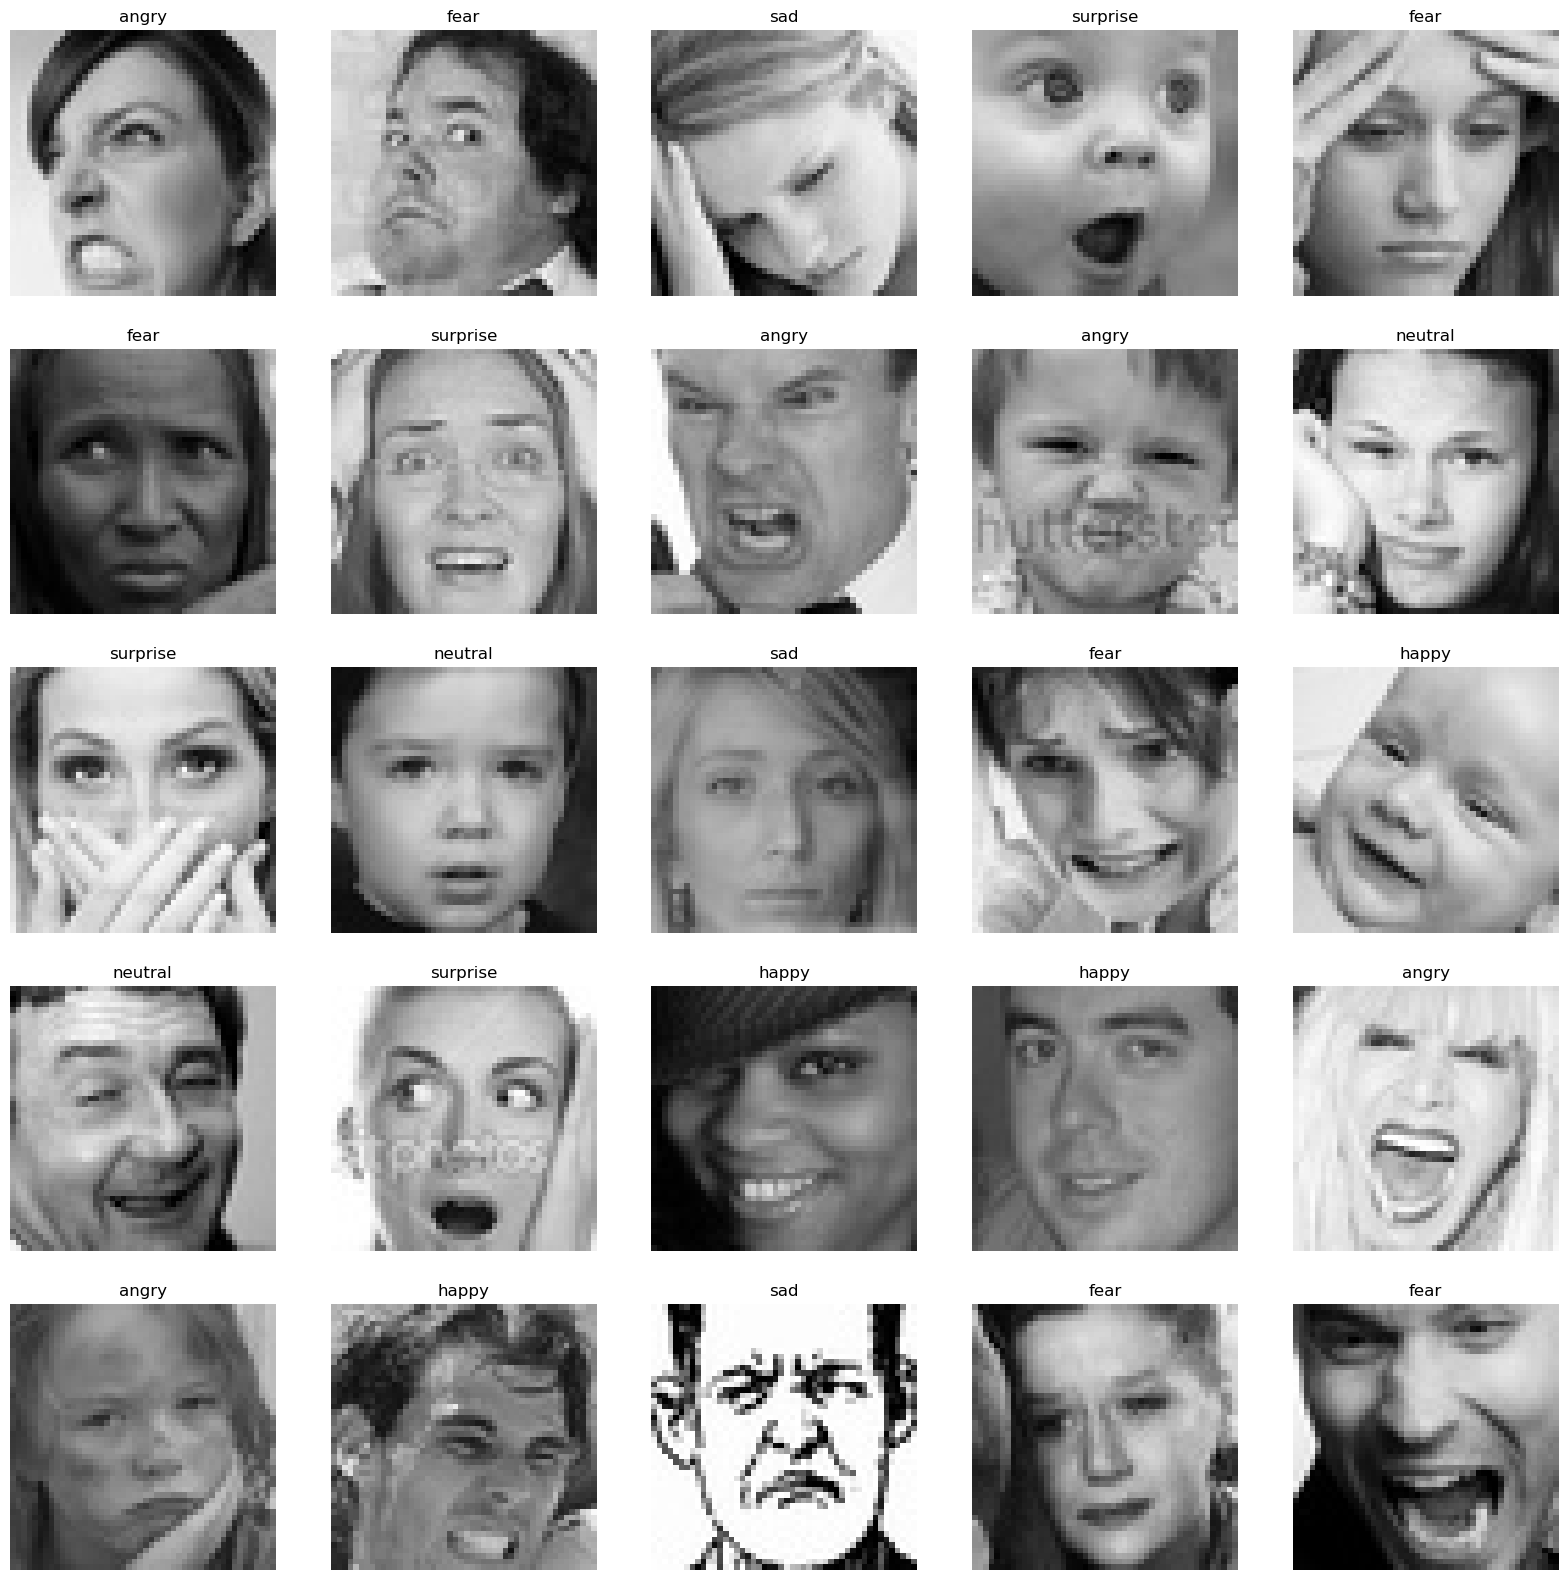

In [113]:
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [115]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [117]:
from keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        # Use color_mode='grayscale' for grayscale images
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    return features

# Assuming train['image'] contains the image paths
train_features = extract_features(train['image'])


100%|██████████████████████████████████████████████████████████████████████████| 28709/28709 [00:06<00:00, 4594.32it/s]


In [118]:
train_features = extract_features(train['image'])


100%|██████████████████████████████████████████████████████████████████████████| 28709/28709 [00:06<00:00, 4657.06it/s]


In [119]:
test_features = extract_features(test['image'])


100%|█████████████████████████████████████████████████████████████████████████████| 7178/7178 [00:36<00:00, 198.26it/s]


In [134]:
import numpy as np

x_train = np.array(train_features) / 255.0
x_test = np.array(test_features) / 255.0


In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [138]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [140]:
input_shape = (48, 48, 1)
output_class = 7

In [142]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 150s 648ms/step - accuracy: 0.2402 - loss: 1.8345 - val_accuracy: 0.2471 - val_loss: 1.8140
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 149s 663ms/step - accuracy: 0.2535 - loss: 1.8035 - val_accuracy: 0.2966 - val_loss: 1.7235
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 150s 665ms/step - accuracy: 0.2913 - loss: 1.7247 - val_accuracy: 0.3643 - val_loss: 1.5947
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 151s 673ms/step - accuracy: 0.3609 - loss: 1.6080 - val_accuracy: 0.4451 - val_loss: 1.4247
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 152s 678ms/step - accuracy: 0.4158 - loss: 1.5067 - val_accuracy: 0.4671 - val_loss: 1.3770
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 151s 671ms/step - accuracy: 0.4484 - loss: 1.4277 - val_accuracy: 0.4932 - val_loss: 1.3244
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 151s 673ms/step - accuracy: 0.4623 - loss: 1.3918 - val_accuracy: 0.5056 - val_loss: 1.2754
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 151s 672ms/step - accuracy: 

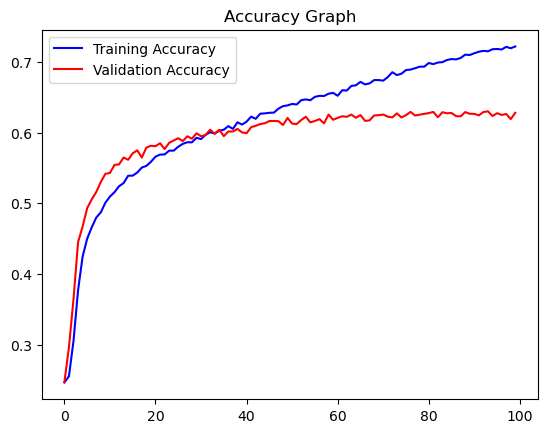

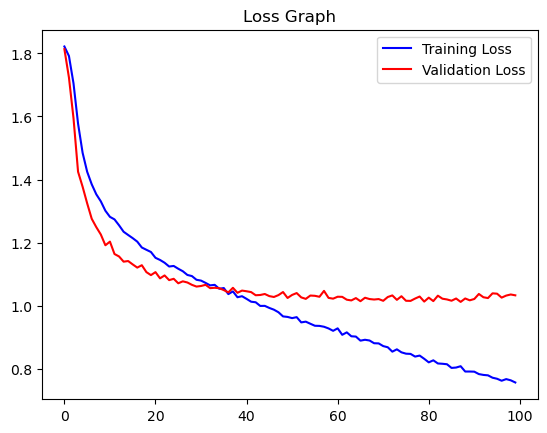

In [146]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()


Original Output: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Predicted Output: surprise


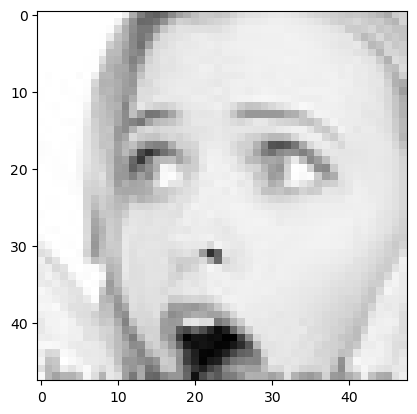

In [148]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Output: neutral


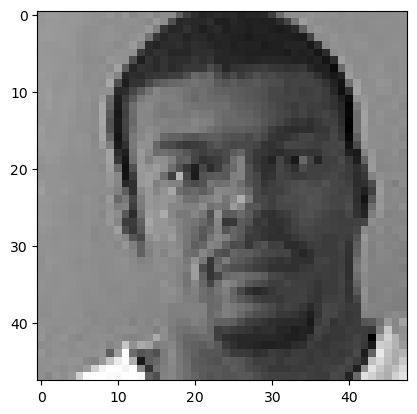

In [150]:

image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Output: happy


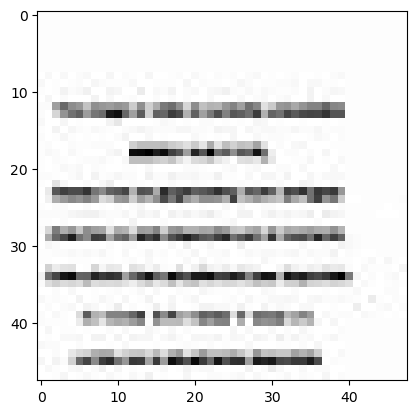

In [152]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Output: angry


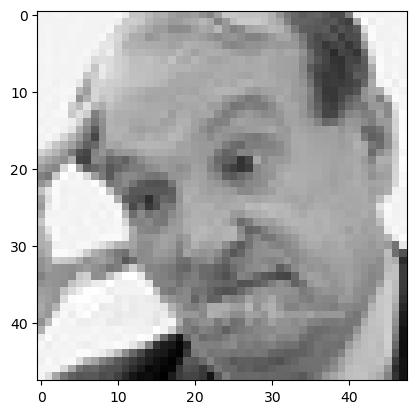

In [154]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Output: neutral


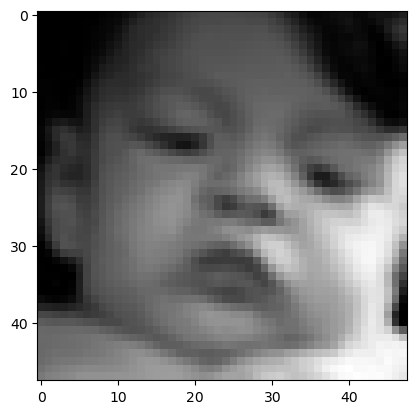

In [156]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Output: happy


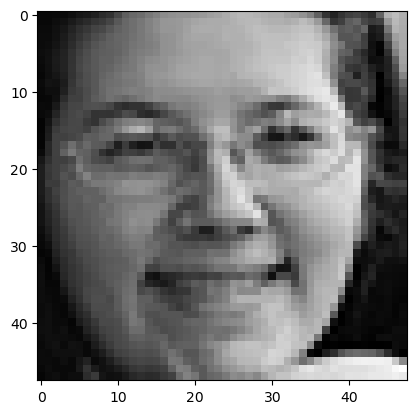

In [158]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Output: sad


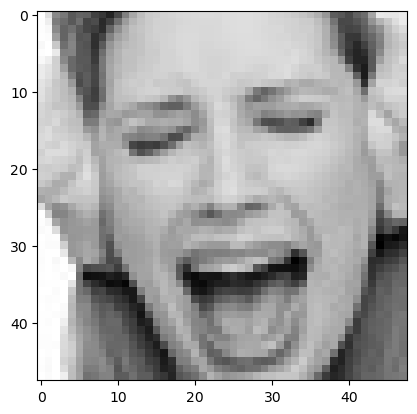

In [160]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');